<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/keras)_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [24]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [25]:
x_train_all.shape, y_train_all.shape

((60000, 28, 28), (60000,))

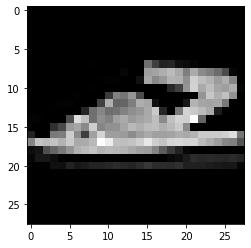

In [26]:
plt.imshow(x_train_all[921], cmap='gray')
plt.show()

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [28]:
x_train.shape, x_val.shape

((48000, 28, 28), (12000, 28, 28))

In [29]:
x_train = x_train / 255
x_val = x_val / 255

In [30]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [31]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [32]:
# sequential 클래스와 dense 클래스 두가지를 사용하는데 sequential은 모델을 만들어주고 거기에 dense 클래스를 사용해서
# 레이어 설정을 지정할 수 있다 (히든레이어 개수, 각 레이어의 노드 개수, 각 레이어의 액티베이션 함수 지정 등)
# 내가 만든 클래스는 뉴럴넷모델과 층이 구분되어 있지 않고 막 섞여있다. 층이 달라지면 꽤나 큰 수정을 해야함
# 케라스는 내가 모델을 짜지 않아도 되는 것은 당연하고 두개가 구분되어 있기 때문에 편리하다.
# sequential 은 햄버거 위아래 번 같은 거고 dense로 내 입맛에 맞게 치즈두장 피클빼고 등등을 조절할 수 있는거라고 보면 될듯

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [33]:
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
# 첫번째 히든레이어를 추가했다. 100은 해당레이어의 유닛(노드) 개수, activation은 내가 아는 활성함수들이 전부 가능하며 
# 이렇게 각 레이어마다 다르게 설정해줄 수 있다. 
# 첫번째 히든레이어에는 input_shape 에 대한 값을 넣어줘야 한다. 
# 신경망 구성에 샘플개수는 영향을 끼치지 않으므로 28 * 28인 784만 넣어주면 된다

In [35]:
model.add(Dense(10, activation='softmax'))
# 레이어 한개 더 추가. 히든 레이어 한개만 적용해볼거니까 얘는 아웃풋 레이어가 된다. 
# 다중분류이므로 유닛개수 10개, 활성함수는 소프트맥스

In [42]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# fit 메소드를 쓰면 훈련하면서 기록한 정보를 History 객체에 담아서 return 한다. 
# metrics 를 입력하지 않으면 loss 만 기록되고 나는 지금 'accuracy' 도 추가한 것

In [43]:
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))
# validation_data는 값을 튜플 형태로 받는 것에 유의
# 에포크마다 깔끔하게 로스하고 정확도 다 뜨는 것봐.... 행복ㅜㅜ

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3690 - accuracy: 0.6450 - val_loss: 0.9581 - val_accuracy: 0.7277
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8420 - accuracy: 0.7385 - val_loss: 0.7504 - val_accuracy: 0.7573
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7132 - accuracy: 0.7606 - val_loss: 0.6653 - val_accuracy: 0.7771
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6491 - accuracy: 0.7770 - val_loss: 0.6166 - val_accuracy: 0.7885
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6076 - accuracy: 0.7911 - val_loss: 0.5786 - val_accuracy: 0.8022
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5772 - accuracy: 0.8009 - val_loss: 0.5520 - val_accuracy: 0.8106
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5538 - accuracy: 0.8094 - val_loss: 0.5316 - val_accuracy:

In [45]:
history.history.keys() 
# history 에 들어있는 값들
# 근데 왜 history 를 두번 쳐야햄?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

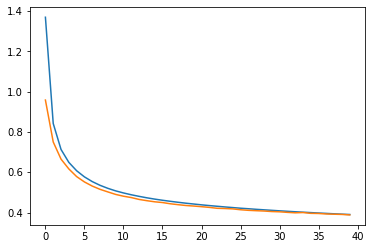

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

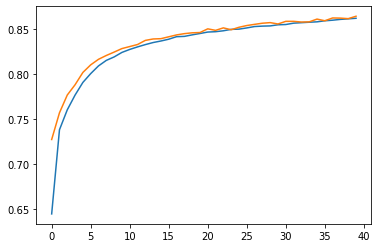

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [49]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
accuracy
# evaluate 는 로스와 내가 추가한 metrics를 return한다

0.8645833134651184